In [1]:
import skorch
from datajoint_tables import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
from plotting import *
from sklearn.linear_model import Ridge

Connecting langdon@pioneer.cshl.edu:3306


## Outline

### I. Latent Circuit Mechanisms 

* #### Circuit mechanisms in small models 
    * Hand tuned circuits (Ardid et al.)
    * Small circuits via backpropagation appear to show a large variety of solutions. An understanding of these mechanisms is important for developing expectations for latent circuits.
       
* #### Latent circuits in large models
    * A latent circuit of $\mathcal{M}$ is a pair $(\bar{\mathcal{M}}, Q)$ such that $\bar{\mathcal{M}} \overset{Q}{\to} \mathcal{M}$
        * **Figure One** Schematic
    * Interpretation: $Q^TW_\text{rec}Q = \bar{W}_\text{rec} \text{ and } Q^T W_\text{in} = \bar{W}_\text{in}$  
    * Sloppiness and validation:
        * **Figure Two:** Inferring embedded circuit: accuracy vs. validation loss plot
    * Application: Context-dependent decision-making
        * **Figure Three:** Adjacency and psychometrics.
        * **Figure Four:** Latent circuit
            * Panel A: Latent adjacency
            * Panel B: Q
            * Trajectories and fits
        * **Figure Five** Perturbations
        * **Figure Six:** Correlation between $(W_\text{in}| W_\text{out})^T$ and $Q$. 
        * **Figure Seven:** Correlations in $W_\text{ext}$
    
### II. Comparison to Linear Regression.
* **Figure Seven:** 
    * Panel A: Linear regression.
    * 2d Projection for comparison.


### III. Supplementary Figures
* **Supplementary Figure One**
    * Scatter plot fits



# Latent Circuit Mechanisms
## Figure Two: Validation
* Train a small model
* Embed trajectories with random orthogonal Q
* Apply LCA

### Table of small models

In [33]:
df = pd.DataFrame((Model() & 'connectivity="small"').proj('model_id', 'connectivity','lr','r2','l2_task').fetch())
df.sort_values(by=['l2_task'],ascending=True).head(5)

,model_id,connectivity,lr,r2,l2_task
16,jC6v1aS0,small,0.001000,0.941931,0.009076
0,1rKbjkPP,small,0.001000,0.937182,0.009818
3,7N1SZMJ8,small,0.001000,0.936579,0.009912
9,fdtFi2Nw,small,0.001000,0.935983,0.010005
18,KWuBKs1M,small,0.001000,0.933558,0.010384


### Table of embedded trials

In [41]:
(EmbeddedTrial() & 'model_id="fdtFi2Nw"').proj('model_id','context','motion_coh','color_coh','hidden','q')

model_id unique model id,trial_id,context,motion_coh,color_coh,hidden,q
fdtFi2Nw,0,color,-0.12,0.20,=BLOB=,=BLOB=
fdtFi2Nw,1,color,0.04,0.20,=BLOB=,=BLOB=
fdtFi2Nw,2,color,-0.04,-0.20,=BLOB=,=BLOB=
fdtFi2Nw,3,motion,-0.12,-0.20,=BLOB=,=BLOB=
fdtFi2Nw,4,motion,0.20,-0.04,=BLOB=,=BLOB=
fdtFi2Nw,5,motion,-0.04,0.04,=BLOB=,=BLOB=
fdtFi2Nw,6,color,-0.04,-0.04,=BLOB=,=BLOB=
fdtFi2Nw,7,color,-0.04,0.04,=BLOB=,=BLOB=
fdtFi2Nw,8,color,-0.20,-0.04,=BLOB=,=BLOB=
fdtFi2Nw,9,color,-0.12,-0.20,=BLOB=,=BLOB=


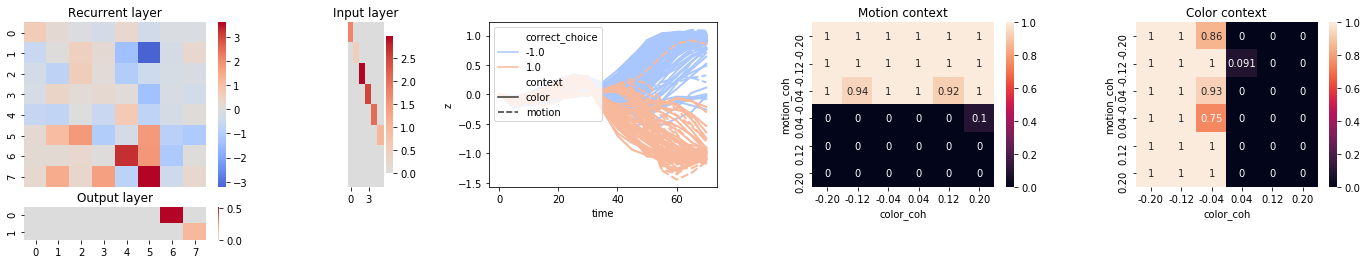

In [4]:
plot_figure_three(Model(), "fdtFi2Nw",Trial() & 'model_id="fdtFi2Nw"')

### Table of latent circuits 

In [32]:
df=pd.DataFrame((LCA() & 'model_id="fdtFi2Nw"').proj('model_id','lca_id','lr','max_epochs','valid_loss','w_error','q_error').fetch())
df.sort_values(by=['valid_loss'],ascending=True).head(5)

,model_id,lca_id,lr,max_epochs,valid_loss,w_error,q_error
12,fdtFi2Nw,6jqmfxw0,0.0100000,4000,0.0229,0.419447,0.211737
0,fdtFi2Nw,1iPzRESG,0.0100000,4000,0.0301,1.829030,0.597168
30,fdtFi2Nw,dBr6vpCM,0.0010000,3000,0.0334,0.774653,0.563024
16,fdtFi2Nw,8j82yMXp,0.0010000,3000,0.0356,0.941028,0.768651
64,fdtFi2Nw,LxBU1A6w,0.0100000,4000,0.0372,1.841220,0.772399


### Figure

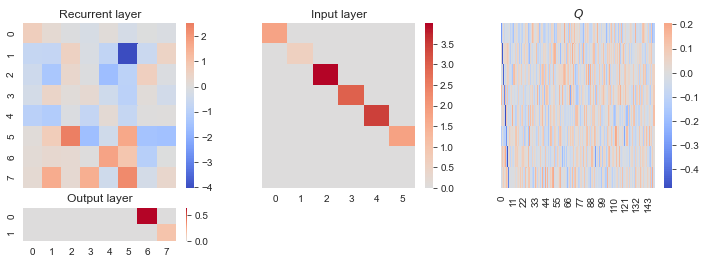

In [22]:
plot_latent_parameters(LCA(), "6jqmfxw0")

Text(0.5, 1.0, 'Sloppiness')

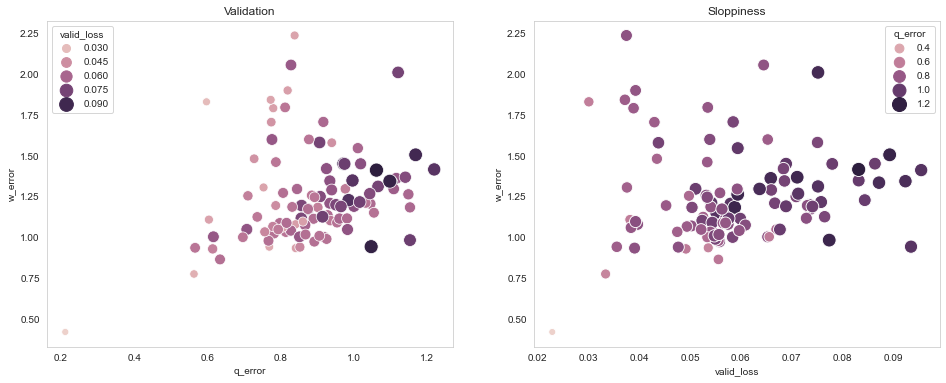

In [72]:
df = pd.DataFrame((LCA() & 'model_id="fdtFi2Nw"' & 'valid_loss<.1').proj('valid_loss','w_error','q_error'))
df = df.astype({'valid_loss': float})
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="q_error", y="w_error", hue='valid_loss',size='valid_loss',sizes=(50,200))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Validation')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x="valid_loss", y="w_error", hue='q_error',size='q_error',sizes=(50,200))
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Sloppiness')

## Figure Three: RNN Model
* Train a large RNN model
* Plot adjacency 
* Psychometrics

### Table of large models

In [40]:
df = pd.DataFrame((Model() & 'connectivity="large"' & 'lambda_r=0.05').proj('model_id', 'connectivity','lr','r2','l2_task','lambda_r','lambda_o').fetch())
df.sort_values(by=['l2_task'],ascending=True)

,model_id,connectivity,lr,lambda_r,lambda_o,r2,l2_task
3,CMwz5p1Z,large,0.001000,0.050000,1.000000,0.977836,0.003464
4,o0YwuNCo,large,0.001000,0.050000,1.000000,0.977095,0.003580
8,YYLT9fcD,large,0.001000,0.050000,1.000000,0.976459,0.003679
6,vZE32oJS,large,0.001000,0.050000,1.000000,0.975523,0.003825
5,rpE9tRDx,large,0.001000,0.050000,1.000000,0.971853,0.004399
0,5a8Myb4M,large,0.001000,0.050000,1.000000,0.971173,0.004505
2,C11pU214,large,0.001000,0.050000,1.000000,0.912727,0.013640
1,BeYHzdxr,large,0.001000,0.050000,1.000000,0.910092,0.014052
7,xv1kq0Xa,large,0.001000,0.050000,1.000000,0.905734,0.014733
9,ZUvRi43y,large,0.001000,0.050000,1.000000,0.905464,0.014775


In [14]:
def plot_model(model_id):
    model_table = Model()
    trial_table = Trial() & {'model_id': model_id}
    gs = gridspec.GridSpec(2, 5, width_ratios=[5,1, 5, 5, 5],height_ratios=[5, 1],wspace=.5) 
    plt.figure(figsize=(24, 4)) 

    # Recurrent matrix
    plt.subplot(gs[0])
    sns.heatmap((model_table & {'model_id':  model_id}).fetch1('w_rec'), center=0, xticklabels=False, cmap='coolwarm')
    plt.title('Recurrent layer')

    # Input matrix
    plt.subplot(gs[1])
    sns.heatmap((model_table & {'model_id':  model_id}).fetch1('w_in'), center=0, yticklabels=False, cmap='coolwarm')
    plt.title('Input layer')

    # Output matrix
    plt.subplot(gs[5])
    sns.heatmap((model_table & {'model_id':  model_id}).fetch1('w_out'), center=0, cmap='coolwarm')
    plt.title('Output layer')

    n_trials = trial_table.fetch().shape[0]
    z = trial_table.fetch('output')
    correct_choice = trial_table.fetch('correct_choice')
    context = trial_table.fetch('context')
    motion_coh = trial_table.fetch('motion_coh')
    color_coh = trial_table.fetch('color_coh')
    x = trial_table.fetch('hidden')

    id_df = pd.DataFrame([])
    T = 15
    for i in range(900):
        for t in range(15):
            if (context[i]=="motion" and motion_coh[i]<color_coh[i]) or (context[i]=="color" and motion_coh[i]>color_coh[i]):
                data = {'time': t*5 ,
                        'correct_choice': correct_choice[i],
                        'motion_coh': motion_coh[i],
                        'color_coh': color_coh[i],
                        'z': float(z[i][t*5,1] - z[i][t*5,0]),
                        'context_x': float(x[i][t*5,1] - x[i][t*5,0]),
                        'motion_x': float(x[i][t*5,3] - x[i][t*5,2]),
                        'color_x': float(x[i][t*5,5] - x[i][t*5,4]),
                       'trial':i,
                       'context': context[i]}

                data = pd.DataFrame(data.items())
                data = data.transpose()
                data.columns = data.iloc[0]
                data = data.drop(data.index[[0]])
                id_df = id_df.append(data)

    id_df["correct_choice"] = id_df["correct_choice"].astype(float)
    id_df["z"] = id_df["z"].astype(float)
    id_df["time"] = id_df["time"].astype(float)
    id_df["context_x"] = id_df["context_x"].astype(float)
    id_df["motion_x"] = id_df["motion_x"].astype(float)
    id_df["color_x"] = id_df["color_x"].astype(float)
    id_df["motion_coh"] = id_df["motion_coh"].astype(float)
    id_df["color_coh"] = id_df["color_coh"].astype(float)

    plt.subplot(gs[2])
    palette = sns.color_palette("coolwarm", 2)
    sns.lineplot(
    data=id_df,
    x="time",
    y="z",
    hue="correct_choice",
    style='context',
    units="trial",
    palette=palette,
    legend='brief',
    lw=2,
    estimator=None
    )
    plt.legend(loc='upper left')



    # Panel C (psychometrics)

    z = trial_table.fetch('output')
    motion_coh = trial_table.fetch('motion_coh')
    color_coh = trial_table.fetch('color_coh')


    id_df = pd.DataFrame([])
    for i in range(900):
            data = {'motion_coh': motion_coh[i],
                    'color_coh': color_coh[i],
                    'choice': float(np.maximum(np.sign(z[i][-1,1] - z[i][-1,0]),0)),
                    'context': context[i]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            id_df = id_df.append(data)
    motion_df = id_df[id_df['context']=="motion"]
    color_df = id_df[id_df['context']=="color"]

    motion_df = motion_df.groupby(['motion_coh', 'color_coh'])
    color_df = color_df.groupby(['motion_coh', 'color_coh'])
    motion_df = ((motion_df['choice'].apply(np.mean))).reset_index()
    color_df = ((color_df['choice'].apply(np.mean))).reset_index()


    plt.subplot(gs[3])
    sns.heatmap(motion_df.pivot(index='motion_coh', columns='color_coh', values='choice'), annot=True,vmin=0, vmax=1)
    plt.title('Motion context')

    plt.subplot(gs[4])
    sns.heatmap(color_df.pivot(index='motion_coh', columns='color_coh', values='choice'), annot=True,vmin=0, vmax=1)
    plt.title('Color context')

### Figure

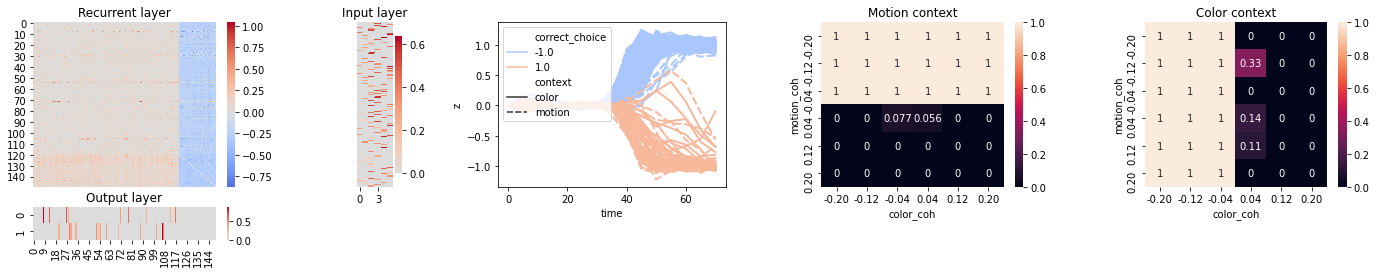

In [45]:
plot_model("5a8Myb4M")

# Figure 4: Latent Circuit
* Fit latent circuit to above model
* Plot latent circuit connectivity
    * Network layout
    * Adjacency matrix
    * Q 
    * Sorted time series for latent neurons

### Table of latent circuits

In [60]:
np.unique(LCA().proj('model_id').fetch('model_id'))

array(['5a8Myb4M', 'C11pU214', 'MWhPjy4R', 'fdtFi2Nw'], dtype=object)

In [61]:
(Model() & 'model_id="C11pU214"')

model_id unique model id,connectivity specify connectivity structure,n number of neurons,lr learning rate,batch_size,lambda_r firing rate regularization constant,lambda_i invariance regularization constant,lambda_o orthogonality regularization constant,lambda_w weight regularization,r2,valid_loss,l2_invar,l2_ortho,l2_rate,l2_weight,l2_task,w_rec,w_in,w_out,train_loss_history,valid_loss_history
C11pU214,large,150,0.001000,180,0.050000,0.000000,1.000000,0.000000,0.912727,0.014944,0.0,5.09571e-06,0.294328,0.0144624,0.0136398,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [56]:
lca_df = pd.DataFrame((LCA() & 'model_id="5a8Myb4M"' ).proj('model_id','lca_id','lr','max_epochs','valid_loss').fetch())
lca_df.sort_values(by=['valid_loss'],ascending=True)

,model_id,lca_id,lr,max_epochs,valid_loss
26,5a8Myb4M,DykEOu7Y,0.0100000,1500,0.0928
67,5a8Myb4M,OTI4Iwr0,0.0100000,1500,0.0931
20,5a8Myb4M,cJKs1AZm,0.0100000,1500,0.0931
98,5a8Myb4M,zOxSSkiv,0.0100000,1500,0.0932
21,5a8Myb4M,cR23aig1,0.0100000,1500,0.0933
...,...,...,...,...,...
11,5a8Myb4M,9kgiqvcP,0.0100000,1500,0.6151
12,5a8Myb4M,9kPCoqe3,0.0100000,1500,0.6222
54,5a8Myb4M,LmHNdmxz,0.0100000,1500,0.6321
91,5a8Myb4M,vxVm3FdR,0.0100000,1500,0.6342


### Figure

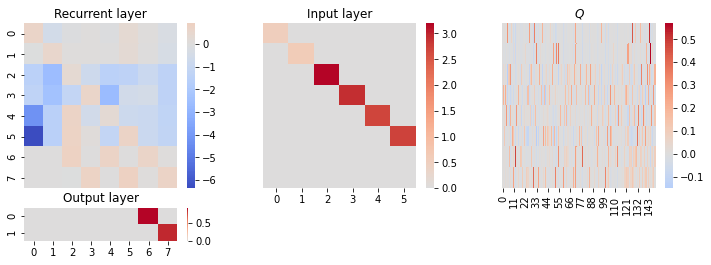

In [50]:
plot_latent_parameters(LCA(), "cJKs1AZm")

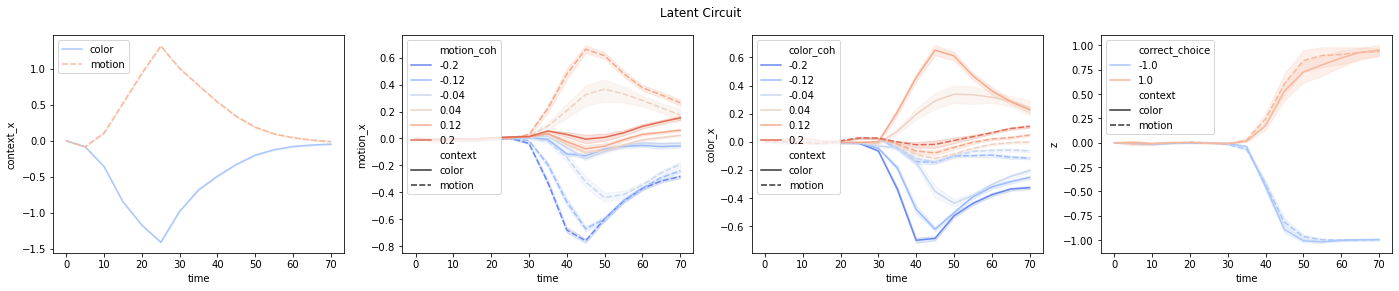

In [55]:
trial_table = Trial() & 'model_id="5a8Myb4M"'
n_trials = trial_table.fetch().shape[0]
z = trial_table.fetch('output')
correct_choice = trial_table.fetch('correct_choice')
context = trial_table.fetch('context')
motion_coh = trial_table.fetch('motion_coh')
color_coh = trial_table.fetch('color_coh')
q = (LCA() & 'lca_id="cJKs1AZm"').fetch1('q')
x = np.stack(trial_table.fetch('hidden') ) @ q.T

id_df = pd.DataFrame([])
T = 15
for i in range(900):
    for t in range(15):
        if (context[i]=="motion" and motion_coh[i]<color_coh[i]) or (context[i]=="color" and motion_coh[i]>color_coh[i]):
            data = {'time': t*5 ,
                    'correct_choice': correct_choice[i],
                    'motion_coh': motion_coh[i],
                    'color_coh': color_coh[i],
                    'z': float(z[i][t*5,0] - z[i][t*5,1]),
                    'context_x': float(x[i,t*5,0] - x[i,t*5,1]),
                    'motion_x': float(x[i,t*5,2] - x[i,t*5,3]),
                    'color_x': float(x[i,t*5,4] - x[i,t*5,5]),
                   'trial':i,
                   'context': context[i]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            id_df = id_df.append(data)

id_df["correct_choice"] = id_df["correct_choice"].astype(float)
id_df["z"] = id_df["z"].astype(float)
id_df["time"] = id_df["time"].astype(float)
id_df["context_x"] = id_df["context_x"].astype(float)
id_df["motion_x"] = id_df["motion_x"].astype(float)
id_df["color_x"] = id_df["color_x"].astype(float)
id_df["motion_coh"] = id_df["motion_coh"].astype(float)
id_df["color_coh"] = id_df["color_coh"].astype(float)

plt.figure(figsize=(24,4)) 
plt.suptitle("Latent Circuit")
plt.subplot(1,4,1)
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="context_x",
hue="context",
style='context',
palette=palette,
legend='brief'
)
plt.legend(loc='upper left')

plt.subplot(1,4,2)
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="motion_x",
hue="motion_coh",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')

plt.subplot(1,4,3)
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="color_x",
hue="color_coh",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')

plt.subplot(1,4,4)
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="z",
hue="correct_choice",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')

# Figure 5: Perturbations
* Perturbations to confirm populations are behaviorally relevant.

### Table of perturbations

In [25]:
ModelPerturbation()

model_id unique model id,perturbation_id,direction,strength
6rV5JuQH,4MC,2,0.100
6rV5JuQH,6AZ,0,-0.100
6rV5JuQH,9Gf,2,0.250
6rV5JuQH,fGu,0,-0.500
6rV5JuQH,K7G,0,0.000
6rV5JuQH,ZnB,0,-0.250


In [27]:
def plot_figure_five(trial_table,title):
    z = trial_table.fetch('output')
    motion_coh = trial_table.fetch('motion_coh')
    color_coh = trial_table.fetch('color_coh')
    context = trial_table.fetch('context')

    id_df = pd.DataFrame([])
    for i in range(900):
            data = {'motion_coh': motion_coh[i],
                    'color_coh': color_coh[i],
                    'choice': np.maximum(np.sign(z[i][-1,1] - z[i][-1,0]),0),
                    'context': context[i]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            id_df = id_df.append(data)
    motion_df = id_df[id_df['context']=="motion"]
    color_df = id_df[id_df['context']=="color"]

    motion_df = motion_df.groupby(['motion_coh', 'color_coh'])
    color_df = color_df.groupby(['motion_coh', 'color_coh'])
    motion_df = ((motion_df['choice'].apply(np.mean))).reset_index()
    color_df = ((color_df['choice'].apply(np.mean))).reset_index()

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(motion_df.pivot(index='motion_coh', columns='color_coh', values='choice'), annot=True,vmin=0.5, vmax=1)
    plt.title('Motion context')

    plt.subplot(1,2,2)
    sns.heatmap(color_df.pivot(index='motion_coh', columns='color_coh', values='choice'), annot=True,vmin=0.5, vmax=1)
    plt.title('Color context')
    plt.suptitle(title)



### Figure

Text(0.5, 16.0, 'Latent Neuron')

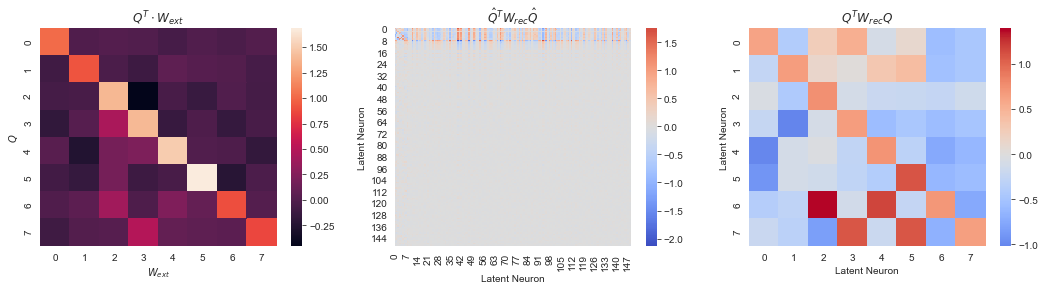

In [54]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
lca_table = LCA() & 'lca_id="mrhq0Ftn"'
model_table = Model() & 'model_id="6rV5JuQH"'
q = lca_table.fetch1('q')
w_in = model_table.fetch1('w_in')
w_out = model_table.fetch1('w_out')
w_ext = np.concatenate((w_in,w_out.T),axis=1)

sns.heatmap(q @ w_ext )
plt.xlabel(r'$W_{ext}$')
plt.ylabel(r'$Q$')
plt.title(r'$Q^T\cdot W_{ext}$')

plt.subplot(1,3,2)
Q = np.random.rand(150,150)
q = lca_table.fetch1('q')
Q[:8,:]=q
Q=Q.T
Q, _ = np.linalg.qr(Q)
Q[:,:8]= q.T
w_rec = model_table.fetch1('w_rec')
sns.heatmap((Q.T @ w_rec @ Q), center=0,cmap='coolwarm')
plt.title(r'$\hat{Q}^TW_{rec}\hat{Q}$')
plt.ylabel('Latent Neuron')
plt.xlabel('Latent Neuron')

plt.subplot(1,3,3)
sns.heatmap((Q.T @ w_rec @ Q)[:8,:8], center=0,cmap='coolwarm')
plt.title(r'$Q^TW_{rec}Q$')
plt.ylabel('Latent Neuron')
plt.xlabel('Latent Neuron')

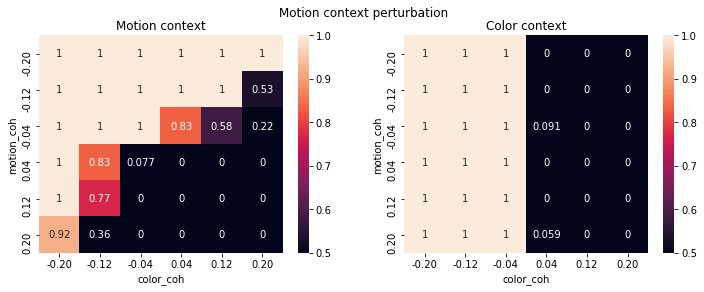

In [29]:
plot_figure_five(PerturbationTrial() & 'perturbation_id="ZnB"', 'Motion context perturbation')

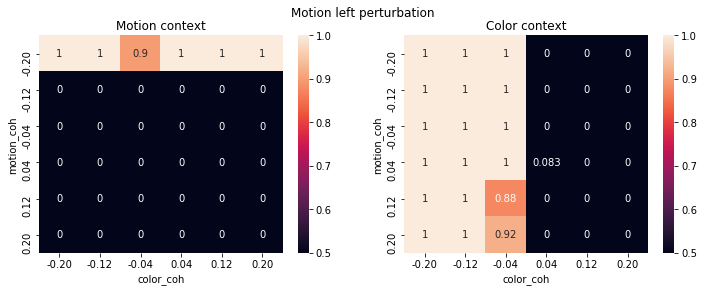

In [31]:
plot_figure_five(PerturbationTrial() & 'perturbation_id="9Gf"', 'Motion left perturbation')

# Figure 6: Interpretation
* Interpretation of latent circuit
    * What is Q?
        * Plotting the matrix $Q^TW_\text{ext}$ shows that $Q\sim W_\text{ext}$
    * Change of basis defined by $Q$
        * Invariance and rank

# Figure 7: Orthogonality of inputs
* Removing constraint on orthogonality of inputs
* Correlation in inputs and outputs are inherited by latent circuit.

In [66]:
df = pd.DataFrame((Model() & 'connectivity="large"' & 'lambda_o=0').proj('model_id', 'connectivity','lr','r2','l2_task','lambda_r','lambda_o').fetch())
df.sort_values(by=['l2_task'],ascending=True).head(10)

,model_id,connectivity,lr,lambda_r,lambda_o,r2,l2_task
6,LX7FtE5z,large,0.001000,0.050000,0.000000,0.986731,0.002074
9,x4MelZox,large,0.001000,0.050000,0.000000,0.985754,0.002226
8,PVZFfaOH,large,0.001000,0.050000,0.000000,0.985124,0.002325
5,LKHrNOom,large,0.001000,0.050000,0.000000,0.983039,0.002651
0,0wkbGOf3,large,0.001000,0.050000,0.000000,0.982938,0.002667
3,c2X1Yvsu,large,0.001000,0.050000,0.000000,0.982838,0.002682
1,3nRlEVeM,large,0.001000,0.050000,0.000000,0.980852,0.002993
7,o3Z6Uwpa,large,0.001000,0.050000,0.000000,0.979994,0.003127
4,dtp58apq,large,0.001000,0.050000,0.000000,0.968959,0.004851
2,6FEegJJ0,large,0.001000,0.050000,0.000000,0.913490,0.013520


### Panels A, B and C

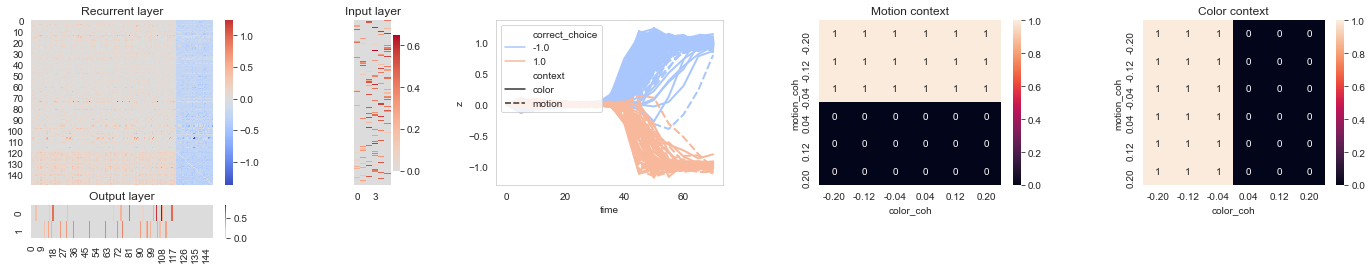

In [68]:
plot_model("MWhPjy4R")

### Panel D

Text(0.5, 1.0, '$W_{ext}^TW_{ext}$')

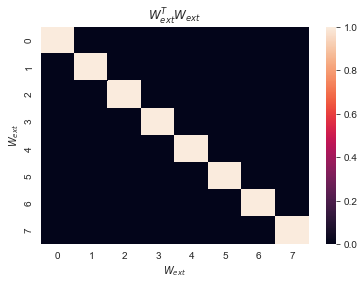

In [69]:
model_table = Model() & 'model_id="MWhPjy4R"'
w_in = model_table.fetch1('w_in')
w_out = model_table.fetch1('w_out')
w_ext = np.concatenate((w_in,w_out.T),axis=1)
w_ext = w_ext / np.linalg.norm(w_ext,axis=0)
sns.heatmap(w_ext.T@w_ext) 
plt.xlabel(r'$W_{ext}$')
plt.ylabel(r'$W_{ext}$')
plt.title(r'$W_{ext}^TW_{ext}$')

# Comparison to Linear Regression
* We compare two types of regression:
$$ \mathbf{y} = \beta \mathbf{x}$$
and 
\begin{align*}
\mathbf{y} &= \beta \mathbf{x}\\
\dot{\mathbf{x}} &= \phi(\mathbf{x})
\end{align*}
* **Figure:** Comparison of motion axes. Regression shows less suppression.
* Explanation: If we decompose the squared error:
\begin{align*}
\Vert \mathbf{y} - \beta\mathbf{x} \Vert^2 &= \Vert \mathbf{y}- \beta\mathbf{x} +\beta\beta^T\mathbf{y}- \beta\beta^T\mathbf{y} \Vert ^2 \\
&= \Vert \mathbf{y} - \beta\beta^T\mathbf{y} \Vert ^2 + \Vert \beta\beta^T\mathbf{y} - \beta^T\beta\mathbf{x} \Vert ^2
\end{align*}
the second term 
$$\Vert \beta\beta^T\mathbf{y} - \beta^T\beta\mathbf{x} \Vert ^2 = \Vert\beta\Vert^2\Vert\beta^T\mathbf{y} - \mathbf{x} \Vert ^2$$
corresponds to the error between the latent variable and the regressor.

In [41]:
model_id = "5a8Myb4M"
trial_data = (Trial() & {'model_id':model_id}).fetch(as_dict=True)

df = pd.DataFrame([])
for trial_number in range(len(trial_data)):
    if trial_data[trial_number]['context']=='motion':
        context = 1
    else:
        context = -1
    for t in range(15):
        
            data = {'correct_choice': trial_data[trial_number]['correct_choice'],
                    'context': context,
                    'motion_coh': float(trial_data[trial_number]['motion_coh']),
                    'color_coh': float(trial_data[trial_number]['color_coh']),
                    'x': trial_data[trial_number]['hidden'][t*5,:]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            df = df.append(data)


Text(0.5, 0.98, 'Linear regression')

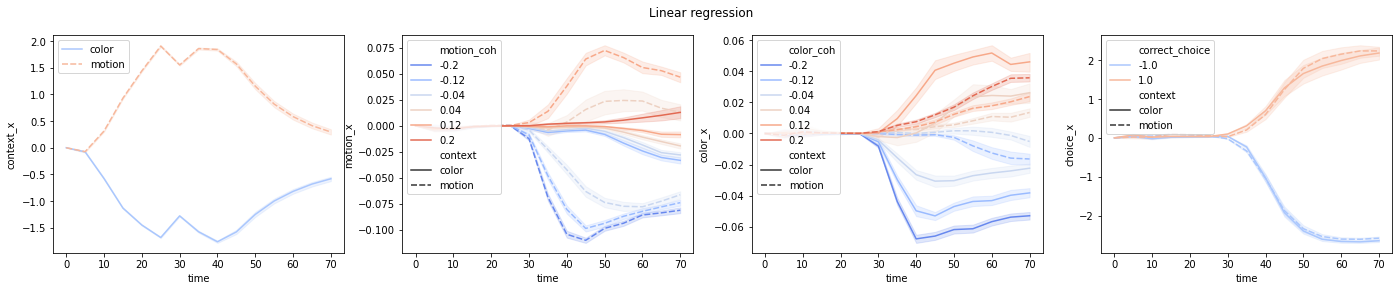

In [42]:
X = df.iloc[:,:-1].values
y = np.stack(df.iloc[:,-1].values)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)
#reg = LinearRegression(normalize=True).fit(X, y)
reg = Lasso(alpha=.025).fit(X, y)
trial_table = Trial() & {'model_id':model_id}
q = reg.coef_/np.linalg.norm(reg.coef_,axis=0)
gs = gridspec.GridSpec(1, 4,hspace=.5) 
plt.figure(figsize=(24,4)) 

n_trials = trial_table.fetch().shape[0]
z = trial_table.fetch('output')
correct_choice = trial_table.fetch('correct_choice')
context = trial_table.fetch('context')
motion_coh = trial_table.fetch('motion_coh')
color_coh = trial_table.fetch('color_coh')
x = np.stack(trial_table.fetch('hidden')) @ q

id_df = pd.DataFrame([])
T = 15
for i in range(900):
    for t in range(15):
        if (context[i]=="motion" and motion_coh[i]<color_coh[i]) or (context[i]=="color" and motion_coh[i]>color_coh[i]):
            data = {'time': t*5 ,
                    'correct_choice': correct_choice[i],
                    'motion_coh': motion_coh[i],
                    'color_coh': color_coh[i],
                    'choice_x': float(x[i][t*5,0] ),
                    'context_x': float(x[i][t*5,1] ),
                    'motion_x': float(x[i][t*5,2]),
                    'color_x': float(x[i][t*5,3]),
                   'trial':i,
                   'context': context[i]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            id_df = id_df.append(data)

id_df["correct_choice"] = id_df["correct_choice"].astype(float)

id_df["time"] = id_df["time"].astype(float)
id_df["context_x"] = id_df["context_x"].astype(float)

id_df["motion_x"] = id_df["motion_x"].astype(float)

id_df["color_x"] = id_df["color_x"].astype(float)
id_df["choice_x"] = id_df["choice_x"].astype(float)

id_df["motion_coh"] = id_df["motion_coh"].astype(float)
id_df["color_coh"] = id_df["color_coh"].astype(float)

# context
plt.subplot(gs[0])
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="context_x",
hue='context',
style='context',
palette=palette,
legend='brief',
)
plt.legend(loc='upper left')

# Motion
plt.subplot(gs[1])
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="motion_x",
hue='motion_coh',
style='context',
palette=palette,
legend='brief',
)
plt.legend(loc='upper left')

# Color 
plt.subplot(gs[2])
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="color_x",
hue = 'color_coh',
style='context',
palette=palette,
legend='brief',
)
plt.legend(loc='upper left')

# Choice
plt.subplot(gs[3])
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="choice_x",
hue = 'correct_choice',
style='context',
palette=palette,
legend='brief',
)
plt.legend(loc='upper left')
plt.suptitle('Linear regression')


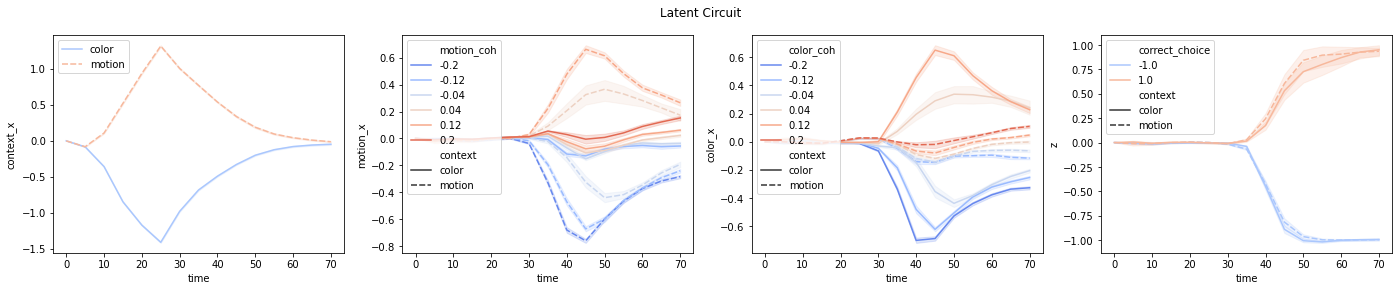

In [48]:
trial_table = Trial() & 'model_id="5a8Myb4M"'
n_trials = trial_table.fetch().shape[0]
z = trial_table.fetch('output')
correct_choice = trial_table.fetch('correct_choice')
context = trial_table.fetch('context')
motion_coh = trial_table.fetch('motion_coh')
color_coh = trial_table.fetch('color_coh')
q = (LCA() & 'lca_id="cJKs1AZm"').fetch1('q')
x = np.stack(trial_table.fetch('hidden') ) @ q.T

id_df = pd.DataFrame([])
T = 15
for i in range(900):
    for t in range(15):
        if (context[i]=="motion" and motion_coh[i]<color_coh[i]) or (context[i]=="color" and motion_coh[i]>color_coh[i]):
            data = {'time': t*5 ,
                    'correct_choice': correct_choice[i],
                    'motion_coh': motion_coh[i],
                    'color_coh': color_coh[i],
                    'z': float(z[i][t*5,0] - z[i][t*5,1]),
                    'context_x': float(x[i,t*5,0] - x[i,t*5,1]),
                    'motion_x': float(x[i,t*5,2] - x[i,t*5,3]),
                    'color_x': float(x[i,t*5,4] - x[i,t*5,5]),
                   'trial':i,
                   'context': context[i]}

            data = pd.DataFrame(data.items())
            data = data.transpose()
            data.columns = data.iloc[0]
            data = data.drop(data.index[[0]])
            id_df = id_df.append(data)

id_df["correct_choice"] = id_df["correct_choice"].astype(float)
id_df["z"] = id_df["z"].astype(float)
id_df["time"] = id_df["time"].astype(float)
id_df["context_x"] = id_df["context_x"].astype(float)
id_df["motion_x"] = id_df["motion_x"].astype(float)
id_df["color_x"] = id_df["color_x"].astype(float)
id_df["motion_coh"] = id_df["motion_coh"].astype(float)
id_df["color_coh"] = id_df["color_coh"].astype(float)

plt.figure(figsize=(24,4)) 
plt.suptitle("Latent Circuit")
plt.subplot(1,4,1)
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="context_x",
hue="context",
style='context',
palette=palette,
legend='brief'
)
plt.legend(loc='upper left')

plt.subplot(1,4,2)
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="motion_x",
hue="motion_coh",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')

plt.subplot(1,4,3)
palette = sns.color_palette("coolwarm", 6)
sns.lineplot(
data=id_df,
x="time",
y="color_x",
hue="color_coh",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')

plt.subplot(1,4,4)
palette = sns.color_palette("coolwarm", 2)
sns.lineplot(
data=id_df,
x="time",
y="z",
hue="correct_choice",
style='context',
palette=palette,
legend='brief'

)
plt.legend(loc='upper left')


# Supplementary Figures